**Пестова Алена**

*Вариант 8*
    
Пусть имеем выборку: $$x_1, ..., x_n \sim Bin(m, p)$$

Оценка: 
$$\hat{\theta}_n = e^{\bar{x}}$$


1) Для какого параметра $$\theta_0 = \theta_0(m, p)$$ оценка будет асимптотически нормальной оценкой? Продемонстрировать асимптотическую нормальность с помощью моделирования.


2) Иследовать оценку на (асимптотическую) несмещенность.

### Ассимптотическая нормальность

Оценка будет ассимптотически нормальна для параметра:

$$\theta = e^{mp}$$

Чтобы показать, что оценка ассимптотически нормально, необходимо продемонстировать, что есть следующая сходимость по распределению

$$\dfrac{\sqrt{n}(\hat{\theta}_n - \theta)}{\sigma(\theta)} \rightarrow N(0, 1), n \rightarrow +\infty$$

то есть, что

$$\dfrac{\sqrt{n}(e^{\overline{x}} -  e^{mp})}{\sigma(e^{\overline{x}})} \rightarrow N(0, 1), n \rightarrow +\infty$$


Покажу это для параметров m = 100, p = 0.3. По 500 раз набираю выборки по n элементов и смотрю на распределение для 500 таких оценок.

Как можно видеть по графикам, функции распределения сходятся.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import math
from IPython.display import display, Math
import scipy.stats as st
rcParams.update({'font.size': 12})

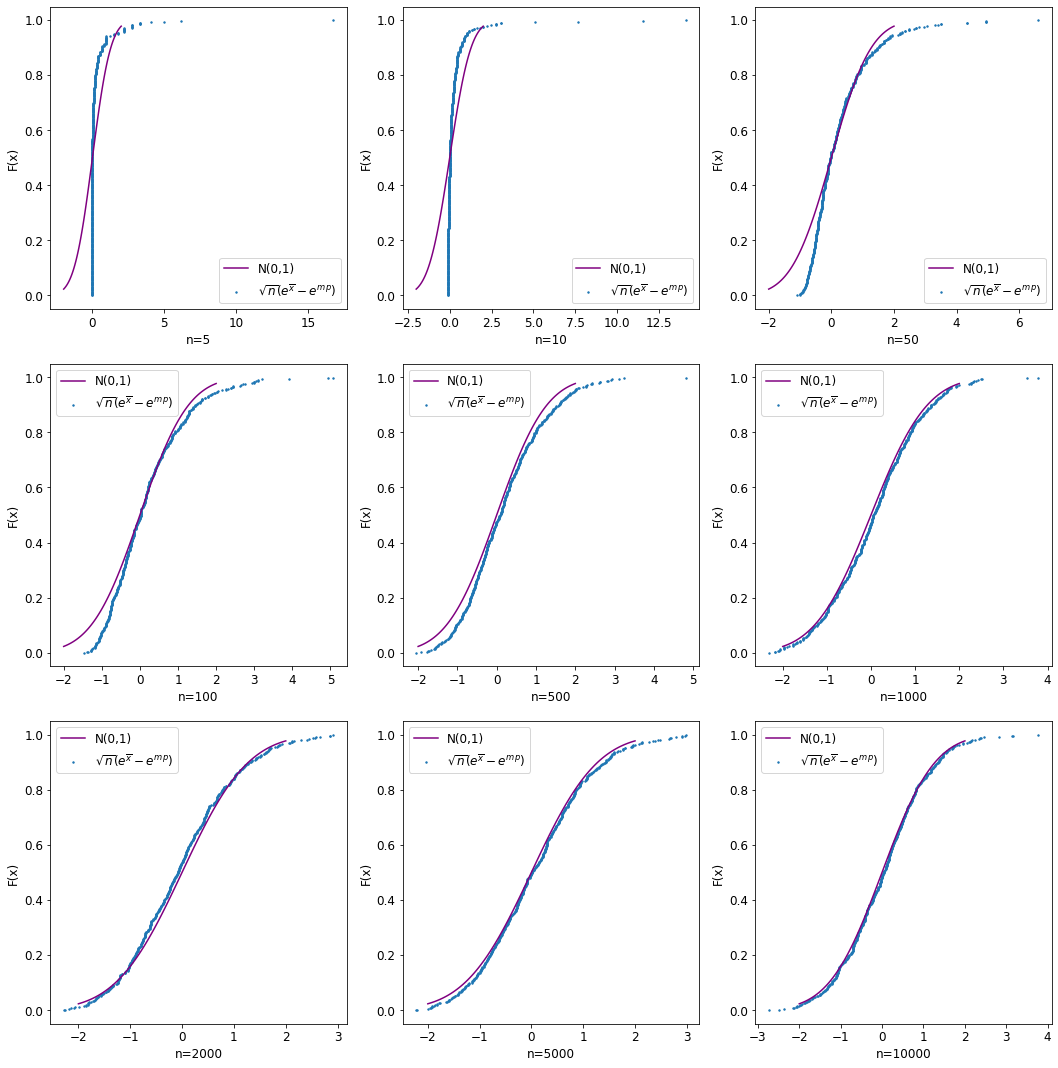

In [3]:
plt.figure(figsize=(15, 15))

m = 100
p = 0.3
k = 500

for z, n in enumerate([5, 10, 50, 100, 500, 1000, 2000, 5000, 10000]):
    
    point_ests = []
    for i in range(k):
        sample = np.random.binomial(m, p, size = n)
        point_ests.append(math.exp(np.mean(sample)))
        
    a = np.sort([math.sqrt(n)*(est - math.exp(m*p)) for est in point_ests])
    a = a / np.std(a)
    X_axis = np.linspace(-2, 2, 100)
    plt.subplot(3, 3, z+1)
    plt.tight_layout()
    plt.ylabel('F(x)')
    plt.xlabel(f'n={n}')
    plt.scatter(a, [i/k for i in range(k)], s=2, label='$\sqrt{n}(e^{\overline{x}} - e^{mp})$')
    plt.plot(X_axis, st.norm.cdf(X_axis), color = 'purple', label='N(0,1)')
    plt.legend()
        
plt.show()

### Ассимптотическая несмещенность

Для того, чтобы проверить оценку на ассимтотическую несмещенность, необходимо проверить, что мат ожидание оценки слабо стремится к параметру при росте выборки.

Именно это я и проверяю ниже, на графиках изображены средние значения оценок выборок для различных n. Графики сделаны для различных значений m и p. По ним видно, что с ростом выборки, оценка все ближе к прямой, обозначающей параметр *exp(mp)*.

In [9]:
rcParams.update({'font.size': 16})

def make_plot(m, p, z):
    all_ests = []
    X_axis = list(range(0, 100000, 100))

    for k, n in enumerate(X_axis):

        sample = np.random.binomial(m, p, size = n)
        point_est = math.exp(np.mean(sample))
        all_ests.append(np.mean(point_est))
        
    plt.subplot(3, 4, z+1)
    plt.tight_layout()
    
    plt.title(f"Bin({m}, {p})")
    plt.scatter(X_axis, all_ests, color='blue', s=2, label='$e^{\overline{x}}$')
    plt.hlines(y=math.exp(m*p), xmin = min(X_axis), xmax=max(X_axis), color='red',label = '$e^{mp}$')
    
    plt.xlabel(f"Значение оценки", fontsize=21)
    plt.ylabel(f'n, размер выборки ', fontsize=21)
    plt.legend()

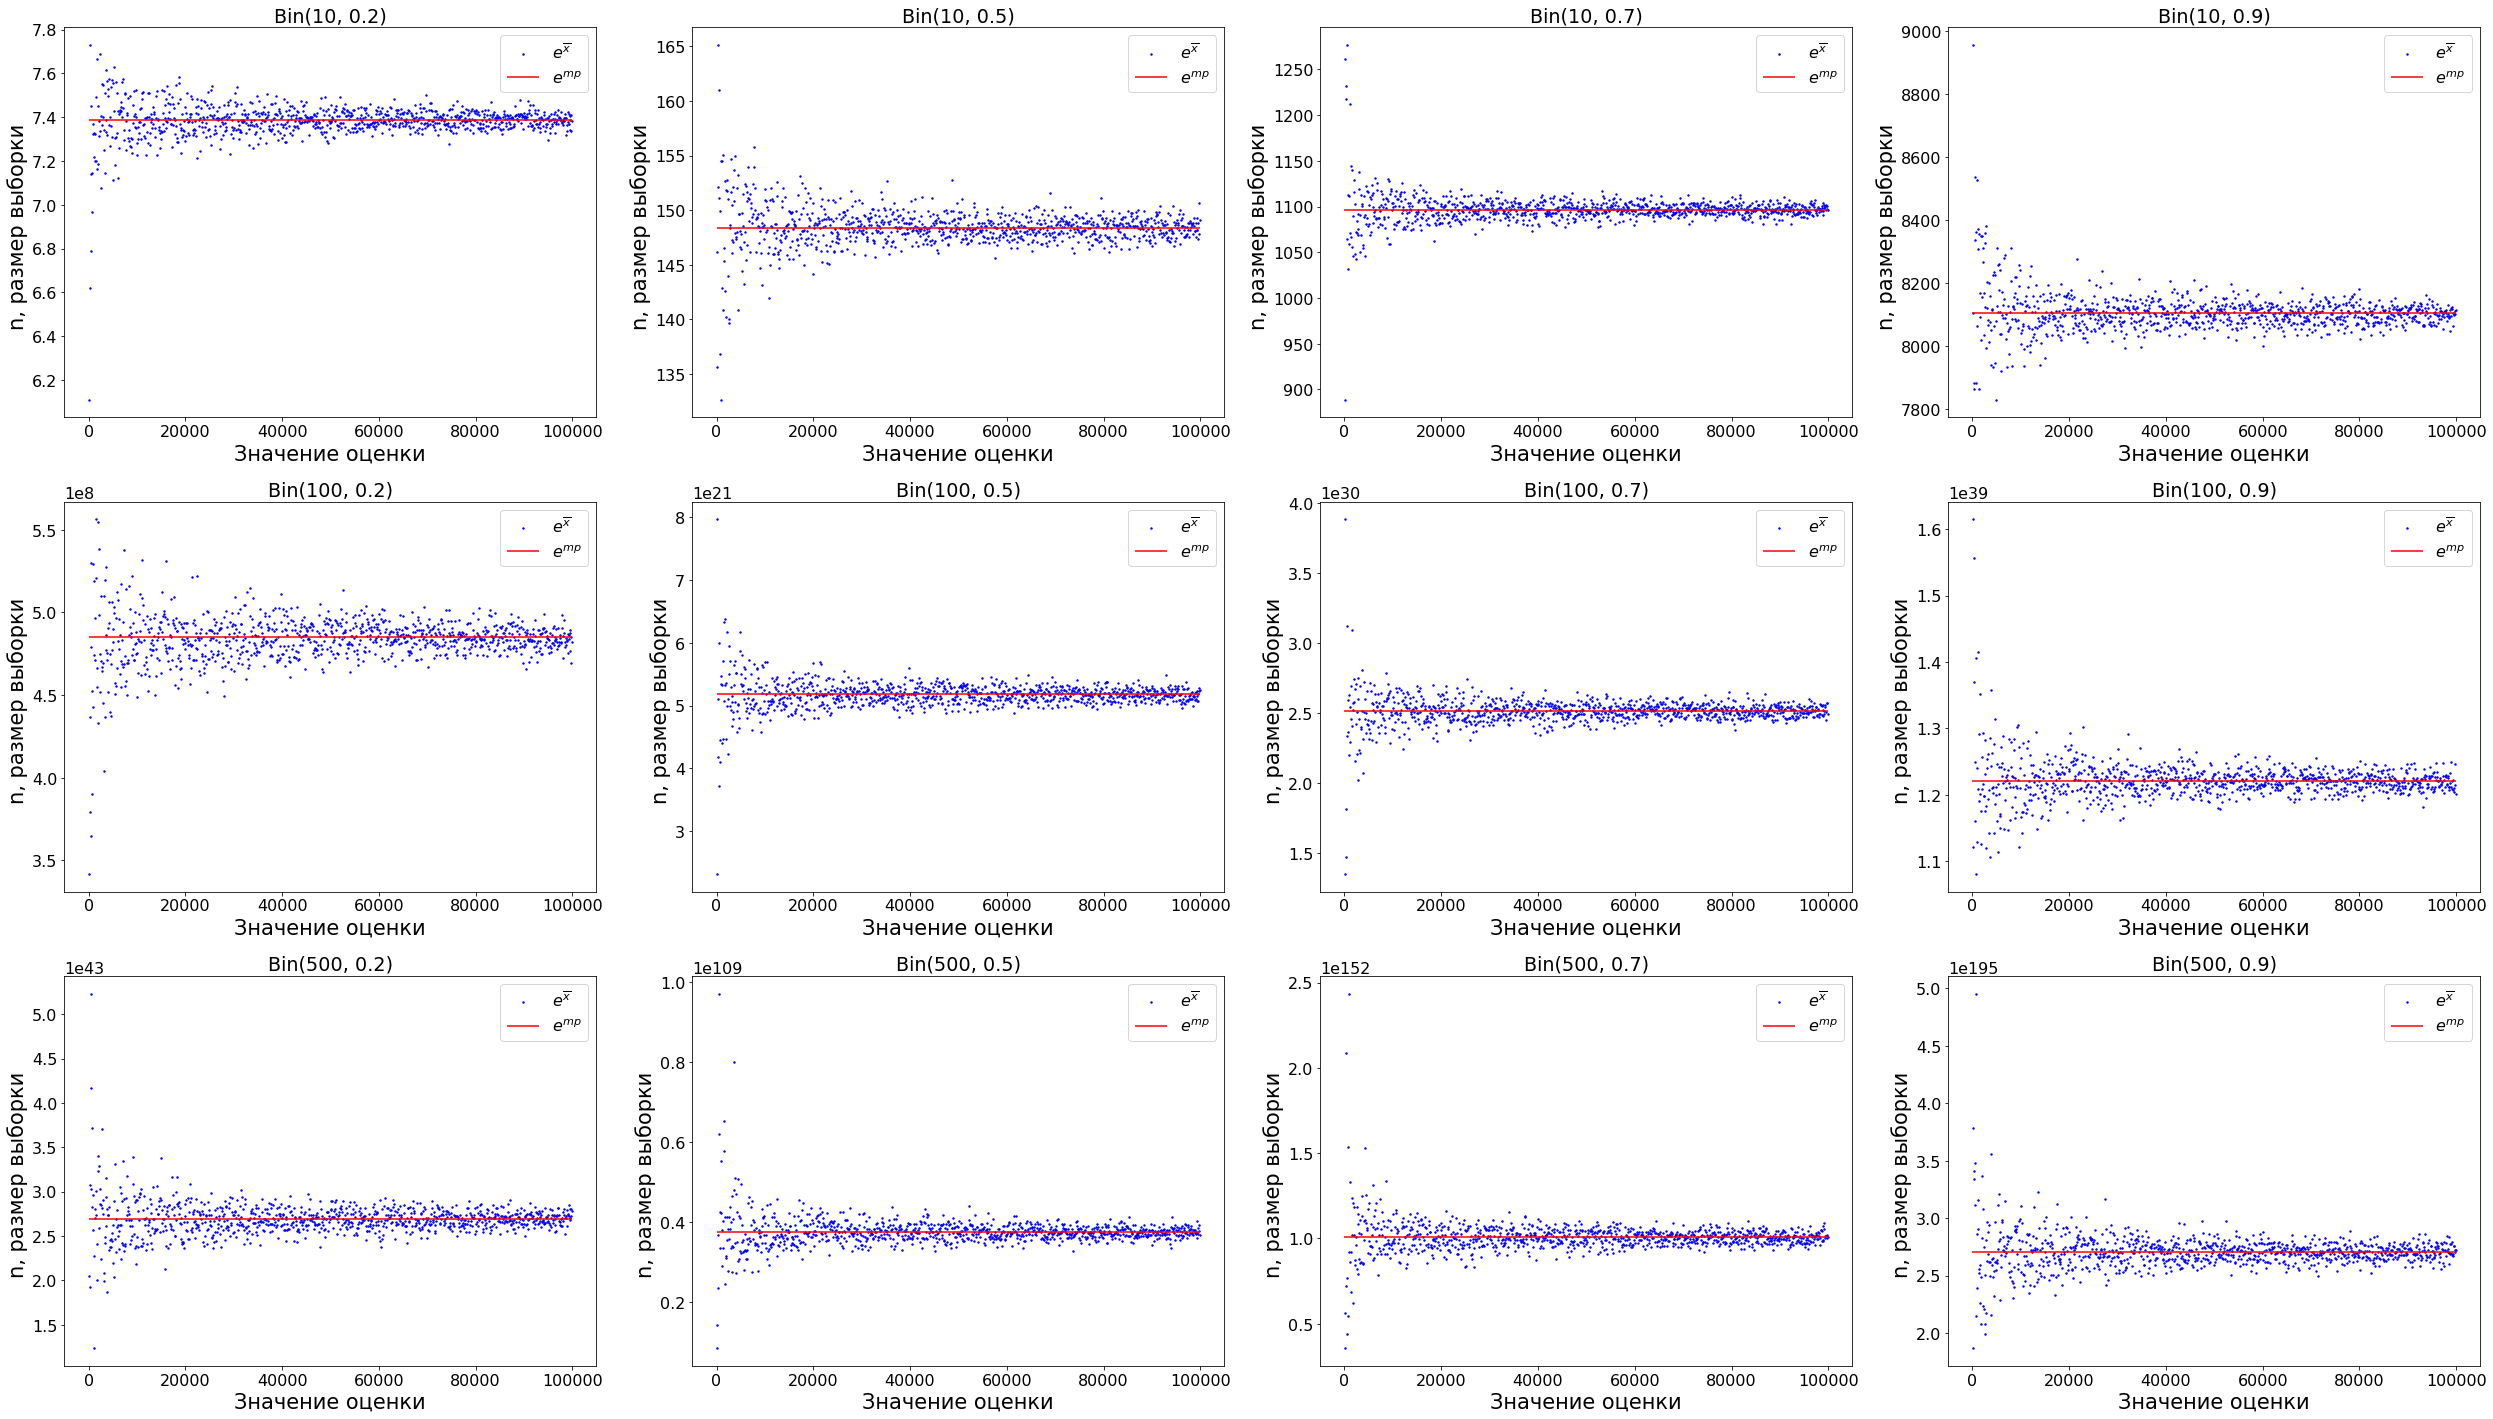

In [10]:
from scipy.stats import binom
plt.figure(figsize=(35, 20))

k = 0
for m in [10, 100, 500]:
    for p in [0.2, 0.5, 0.7, 0.9]:
        make_plot(m, p, k)
        k += 1
plt.show()